# Inaugural Project

In [7]:
#First we import all the packages that we are going to use in the following project
from scipy import optimize
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


# Question 1

In [8]:
# Question 1

# 1.1: Here we specify the parameter-values stated in the Inagural project destription
w = 1 
m = 1
V = 10
epsilon = 0.3
tau0 = 0.4
tau1 = 0.1 
kappa = 0.4

# 1.2: We then specify the utility-function, and afterwards, the optimizing choice given the expression of the constraint. 
#Note that we initially substitute c for x in the constraint expression, given the monotonic preferences
def u_func(l,c,V,epsilon):
    return np.log(c) - V*(l**(1+1/epsilon)/(1+1/epsilon))

def value_of_choice(l,m,V,epsilon,tau0,tau1,kappa):
    c = m + w*l - tau0*w*l - tau1*max(w*l-kappa,0)
    return -u_func(l,c,V,epsilon)

# 1.3: Here we define the the solution and the scipy.optimize method 'bounded', 
# define the bounds from the description, and specify the arguments (parameters)
sol_case1 = optimize.minimize_scalar(
value_of_choice,method='bounded',
bounds=(0,1),args=(m,V,epsilon,tau0,tau1,kappa))

# 1.4: We then unpack all the solutions
l_svar = sol_case1.x
c_svar = m + w*l_svar - tau0*w*l_svar - tau1*max(w*l_svar-kappa,0)
u = u_func(l_svar,c_svar,V,epsilon)


# Question 2

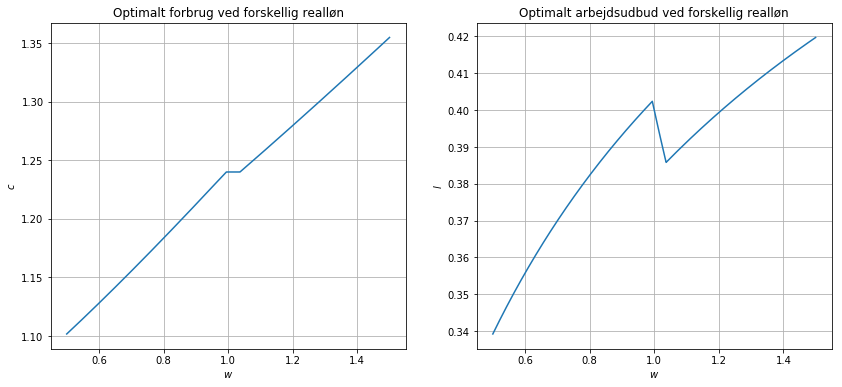

In [9]:
# Question 2
# In this question we want to find the utility maximizing values of c & l, given different values of w. 

# 2.1: We create empty lists for our values of l, c & w, so that we can later plot them graphically.
w_values = []
l_values = []
c_values = []

# 2.2: The next lines of code uses the same method of optimization as in question 1. Only this time, we use a for loop to maximize 
# over a 10000 different values of w, that we have spaced linearly between 0.5 & 1.5. 
for w in np.linspace(0.5,1.5,10000):
    sol_case1 = optimize.minimize_scalar(
    value_of_choice, method='bounded',
    bounds=(0,1), args=(m, V, epsilon, tau0, tau1, kappa))
    
    l_svar = sol_case1.x
    c_svar = m + w*l_svar - tau0*w*l_svar - tau1*max(w*l_svar-kappa,0)
    
    # Now that we have created our values with the loop, we append them to our empty lists.
    w_values.append(w)
    l_values.append(l_svar)
    c_values.append(c_svar)


# 2.3: We create our figure and specify the dimensions
fig = plt.figure(figsize=(14,6))

# We generate our first figure (left) with 1 row and 2 columns
ax_left = fig.add_subplot(1,2,1)

# Here we plot the values for w on the x-axis and the values for c on the y-axis
ax_left.plot(w_values,c_values)

# Cosmetics:
ax_left.set_title('Optimalt forbrug ved forskellig realløn')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$c$')
ax_left.grid(True)

# 2.4: We generate our second figure (right) with 1 row and 2 columns
ax_left = fig.add_subplot(1,2,2)

# Here we plot the values for w on the x-axis and the values for l on the y-axis
ax_left.plot(w_values,l_values)

# Cosmetics:
ax_left.set_title('Optimalt arbejdsudbud ved forskellig realløn')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l$')
ax_left.grid(True)

# Question 3

In [10]:
# Question 3
# 3.1: We define parameters
m = 1
V = 10
epsilon = 0.3
tau0 = 0.4
tau1 = 0.1
kappa = 0.4

# 3.2: We now define empty lists
w_values = []
l_values = []
c_values = []


# 3.3: And set the seed
np.random.seed(2020)

# 3.4: We now loop through all possible c* and l* values
for w in np.random.uniform(low=0.5,high=1.5,size=10000):
    sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(m,V,epsilon,tau0,tau1,kappa))
    
    l_svar = sol_case1.x
    c_svar = m + w*l_svar - tau0*w*l_svar - tau1*max(w*l_svar-kappa,0)
    
# 3.5: And append w and l* values
    w_values.append(w)
    l_values.append(l_svar)
    c_values.append(c_svar)

# 3.6: We now define w and l* as arrays
w_i = np.array(w_values)
l_i = np.array(l_values)
c_i = np.array(c_values)

# 3.7: Define the parameters as arrays
elements = 10000
tau0_i = np.array([tau0] * elements)
tau1_i = np.array([tau1] * elements)
kappa_i = np.array([kappa] * elements)

# 3.8: At last we calculate total revenue with the given formula
T = sum(tau0_i*w_i*l_i+tau1_i*np.max(w_i*l_i-kappa_i,0))
print(f'T = {T:5f}')


T = 1799.279206


# Question 4

In [11]:
# Question 4
# 4.1: Here we ammend the parameter-value of epsilon
epsilon = 0.1


# 4.2: We define new empty lists
w_values = []
l_values = []
c_values = []


# 4.3: And use the same seed as before
np.random.seed(2020)

# 4.4: We now loop through all possible c* and l* values
for w in np.random.uniform(low=0.5,high=1.5,size=10000):
    sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(m,V,epsilon,tau0,tau1,kappa))
    
    l_svar = sol_case1.x
    c_svar = m + w*l_svar - tau0*w*l_svar - tau1*max(w*l_svar-kappa,0)
    
# 4.5: And append w and l* values
    w_values.append(w)
    l_values.append(l_svar)
    c_values.append(c_svar)

# 4.6: We now define w and l* as arrays
w_i = np.array(w_values)
l_i = np.array(l_values)
c_i = np.array(c_values)
 
# 4.7: And define parameters as arrays
elements = 10000
tau0_i = np.array([tau0] * elements)
tau1_i = np.array([tau1] * elements)
kappa_i = np.array([kappa] * elements)

# 4.8: And at last calculate the new total revenue with the given formula
T = sum(tau0_i*w_i*l_i+tau1_i*np.max(w_i*l_i-kappa_i,0))
print(f'T = {T:5f}')

T = 3568.309897


# Question 5

In [12]:
#Question 5
# 5.1: We define the wage as a uniform stocastic variable, and specify the mean for later use
w_i = np.random.uniform(low=0.5,high=1.5,size=1000)
w_mean = np.mean(w_i)

# 5.2: We define a function 'max_revenue' that takes a 4 dimensional tuple (vector) as input, with the parameter-values,
# and l* (the independent variable in the utility maximization problem)
def max_revenue(tau0,w_mean,l_svar,tau1,kappa):
    tau0 = x[0]
    tau1 = x[1]
    kappa = x[2]
    l_svar = x[3]

    return -u_func(l,c,V,epsilon)

# 5.3: We define the constraints, as a lambda-function that specifies the tax revenue as function of the parameters, and the bounds (0,1) (0%,100%),
# given that the parameters Tau0, Tau1, kappa are shares, and l is constrained to (0,1) accordingly
constraints = ({'type': 'ineq', 'fun': lambda x: sum(tau0*w_mean*l_svar+tau1*np.max(w_mean*l_svar-kappa,0))})
bounds = ((0,1),(0,1),(0,1),(0,1))

# 5.4: We specify an initial guess (randomly) and define the sol_case2 as the result of the optimization, using 'SLSQP' as the optimizer-method
initial_guess = [0.1,0.1,0.1,0.1]
sol_case2 = optimize.minimize(
    max_revenue,initial_guess,args=(tau0,w_mean,l_svar,tau1,kappa),
    method='SLSQP',bounds=bounds,constraints=constraints)

# 5.5: At last we unpack the solutions from sol_case2, as element of the tuple, and print the result
tau0 = sol_case2.x[0]
tau1= sol_case2.x[1]
kappa = sol_case2.x[2]
l_svar = sol_case2.x[3]
print_solution(tau0,tau1,kappa,l_svar)

TypeError: 'numpy.float64' object is not iterable

In [ ]:
D